Tutorial TESS

By: Marcela López


In [1]:
#Modules
import lightkurve as lk 
%matplotlib inline
from lightkurve.correctors import RegressionCorrector, DesignMatrix
from lightkurve.correctors import PLDCorrector
import warnings
import os
import datetime
import Obtain_LC as lc

In [2]:
PATH= datetime.datetime.now().strftime('TESS_%Y%m%dT%H%M%S')
os.makedirs(PATH)

In [3]:
Search_data= lk.search_lightcurve("TOI-122", author= ['SPOC', 'TESS-SPOC']) #Modify as wanted
Search_data

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 01,2018,SPOC,120,231702397,0.0
1,TESS Sector 27,2020,SPOC,20,231702397,0.0
2,TESS Sector 28,2020,SPOC,20,231702397,0.0
3,TESS Sector 27,2020,SPOC,120,231702397,0.0
4,TESS Sector 28,2020,SPOC,120,231702397,0.0
5,TESS Sector 67,2023,SPOC,120,231702397,0.0
6,TESS Sector 68,2023,SPOC,120,231702397,0.0
7,TESS Sector 01,2018,TESS-SPOC,1800,231702397,0.0
8,TESS Sector 27,2020,TESS-SPOC,600,231702397,0.0


In [4]:
#Data from the planet
#Please Change as wanted

T0= 2458425.602564 #Transit Midpoint
T0= T0 - 2457000
P= 5.078030 #Period
binned= 0.005
transits= []

Example with TOI-122

In [5]:
#Download the data you want

sector_data= Search_data[11].download()
sector_name= 'sector_68'

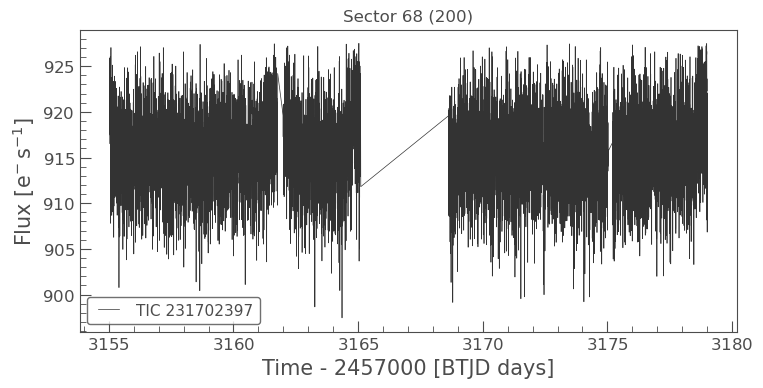

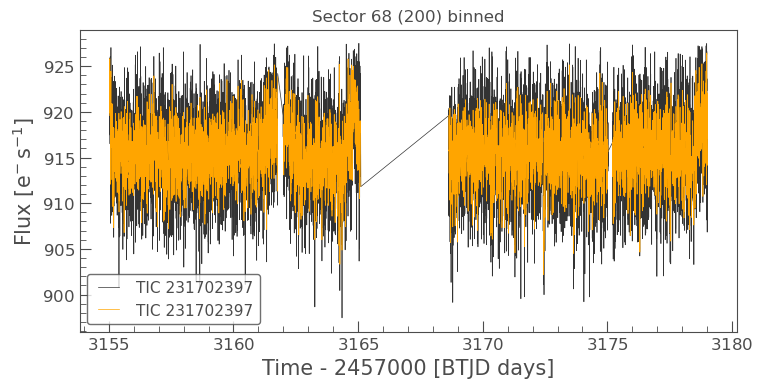

In [6]:
#Removing outliers from your data and Binned
#Play with this if you want ^^
lc.rem_outliers(sector_data, PATH, binned,'Sector 68 (200)') #Change the name as your desire!!

Range of time: 3154.616254825711 - 3182.141385454057
Transit midpoint T0: 1425.602564000059
T0 adjustes to range: 3152.132764000059
Transit times:  [3157.210794000059, 3162.288824000059, 3167.366854000059, 3172.444884000059, 3177.5229140000592]


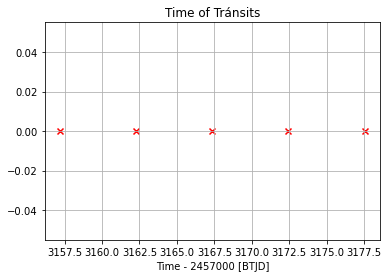

[3157.210794000059, 3162.288824000059, 3167.366854000059, 3172.444884000059, 3177.5229140000592]


In [7]:
#Identify when the transits will happen (Assuming there is no TTV)

lc.transit_identif(sector_data, T0, P, transits)
print(transits)

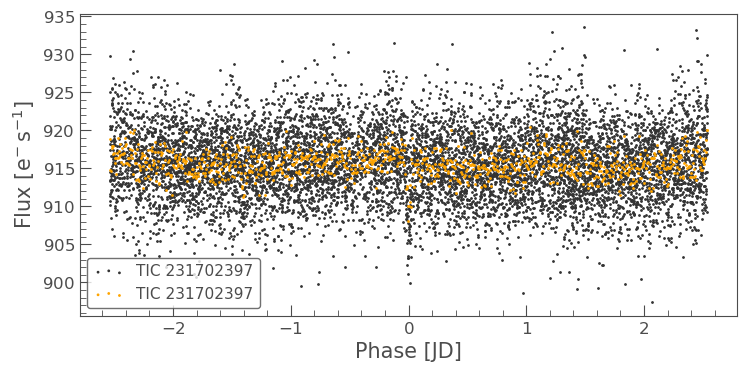

Saving data...



Data_sector_68_PF.csv SAVED in  TESS_20240927T210314  folder.
Data_sector_68_NoPF.csv SAVED in  TESS_20240927T210314  folder.


In [8]:
#Save the data:
#Phase folding data as 
#"Raw" data
#Also, shows phase folding plot binned
#Be careful!! This process take some time


lc.save_data(sector_data, T0, P, PATH, binned, sector_name)

Now you have the phase folding and the raw data of TESS

Now it's time to work with it.

       time        flux flux_err ... mom_centr2_err  pos_corr1     pos_corr2   
------------------ ---- -------- ... -------------- ------------ --------------
 3154.616254825711   --       -- ...   0.0039016141  0.059213422    0.042299036
3154.6185696636658   --       -- ...    0.003873266  0.061750248    0.044489689
3154.6208845020856   --       -- ...   0.0038728712  0.063226134    0.054865748
3154.6231993400397   --       -- ...   0.0039132573  0.061742671    0.039496571
3154.6255141779943   --       -- ...   0.0038889123  0.062129471    0.043922178
3154.6278290164146   --       -- ...    0.003863153  0.062110662    0.050240081
3154.6301438543687   --       -- ...   0.0039015268   0.06215791    0.041332725
               ...  ...      ... ...            ...          ...            ...
 3182.127496865215   --       -- ...   0.0030969644 -0.023416406   -0.013583296
3182.1298116300613   --       -- ...   0.0030787089 -0.015561587  -0.0023902997
3182.1321263949067   --       -- ...   0

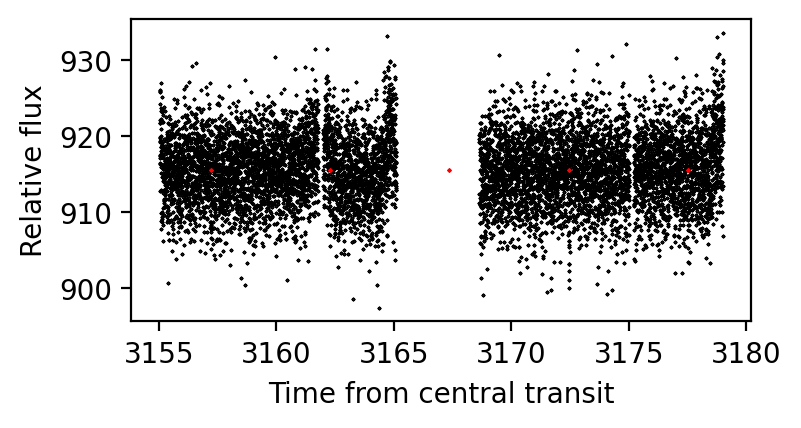

In [9]:
#Working with Raw data

#PATH= 'TESS_20240927T203045'   #PATH NAME 
sector_name= 'sector_68'
name= 'Data_' + sector_name + '_NoPF.csv'
transits= [3157.210794000059, 3162.288824000059, 3167.366854000059, 3172.444884000059, 3177.5229140000592]
T0= 2458425.602564 #Transit Midpoint
T0= T0 - 2457000
P= 5.078030 #Period
binned= 0.005
lc.loading_data(PATH, name, transits)

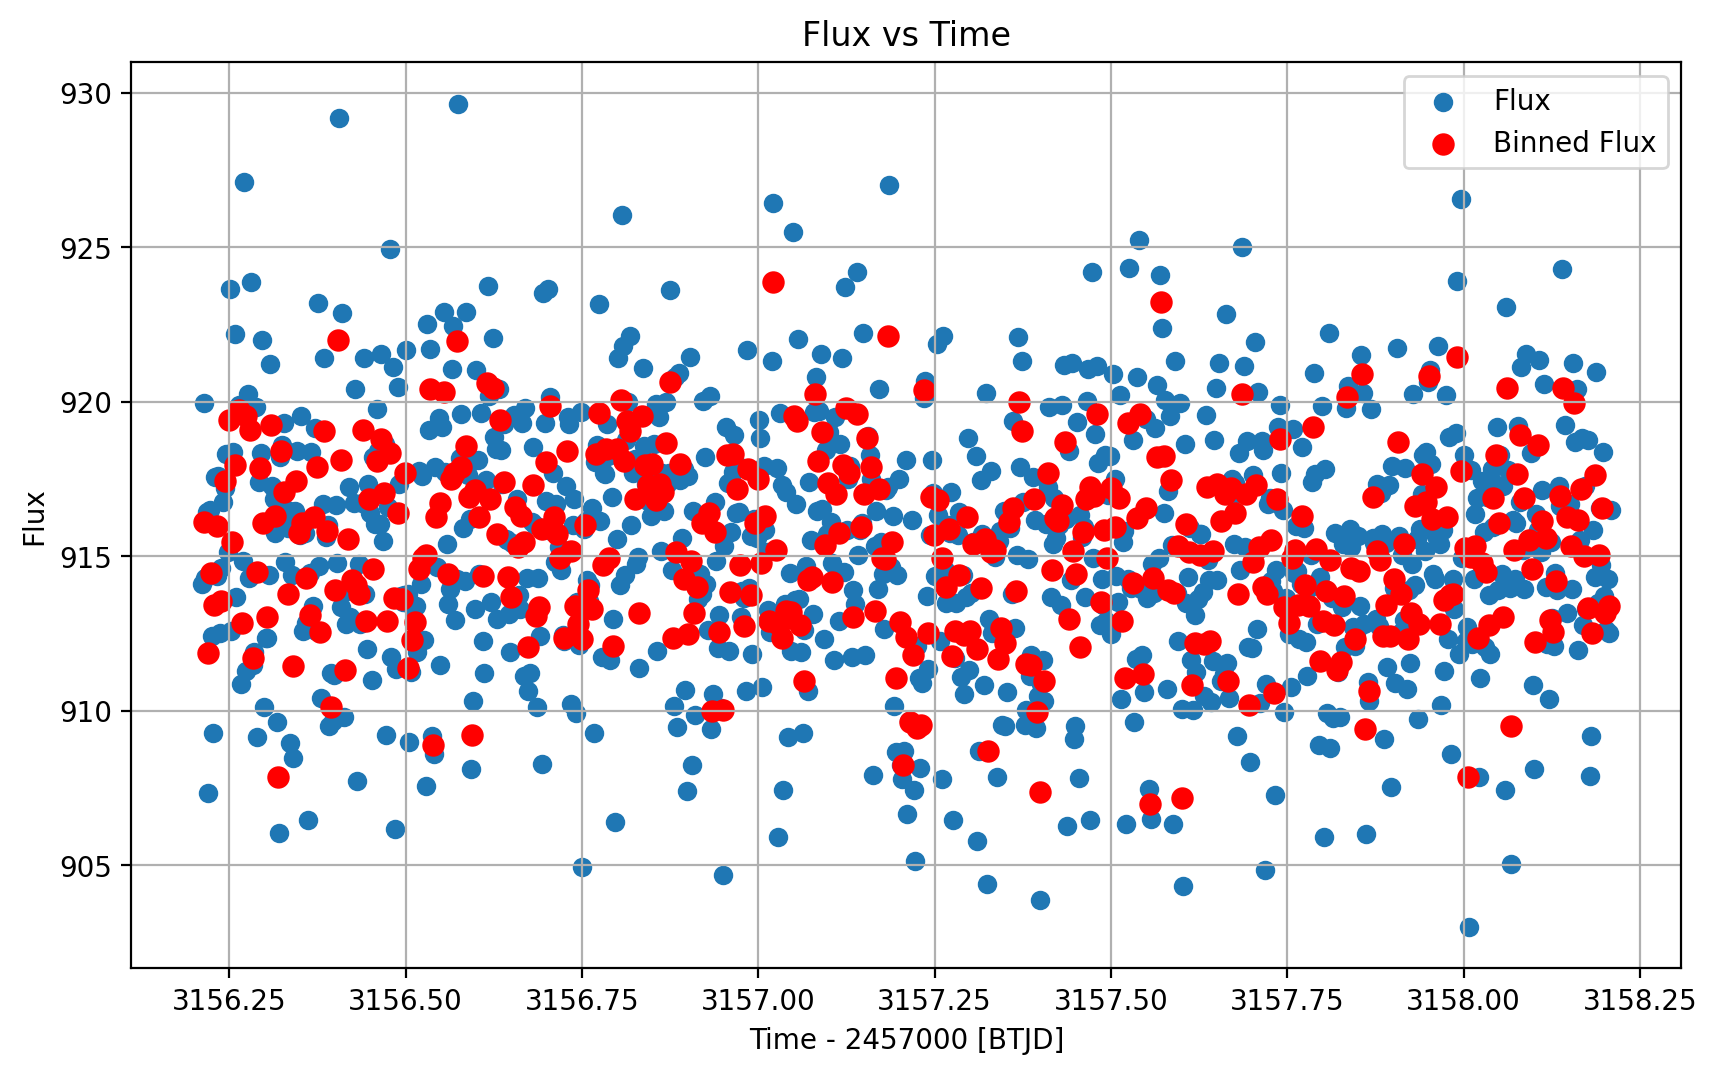

Do you wanna save this transit? (y/n): y
Plot saved.


/home/mashe/Desktop/MOTEred/TESS/TESS_Auto/Obtain_LC.py:122: RuntimeWarning: Mean of empty slice.
  bin_means_time = [time_data[bin_indices == i].mean() for i in range(1, num_bins + 1)]
/home/mashe/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/mashe/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


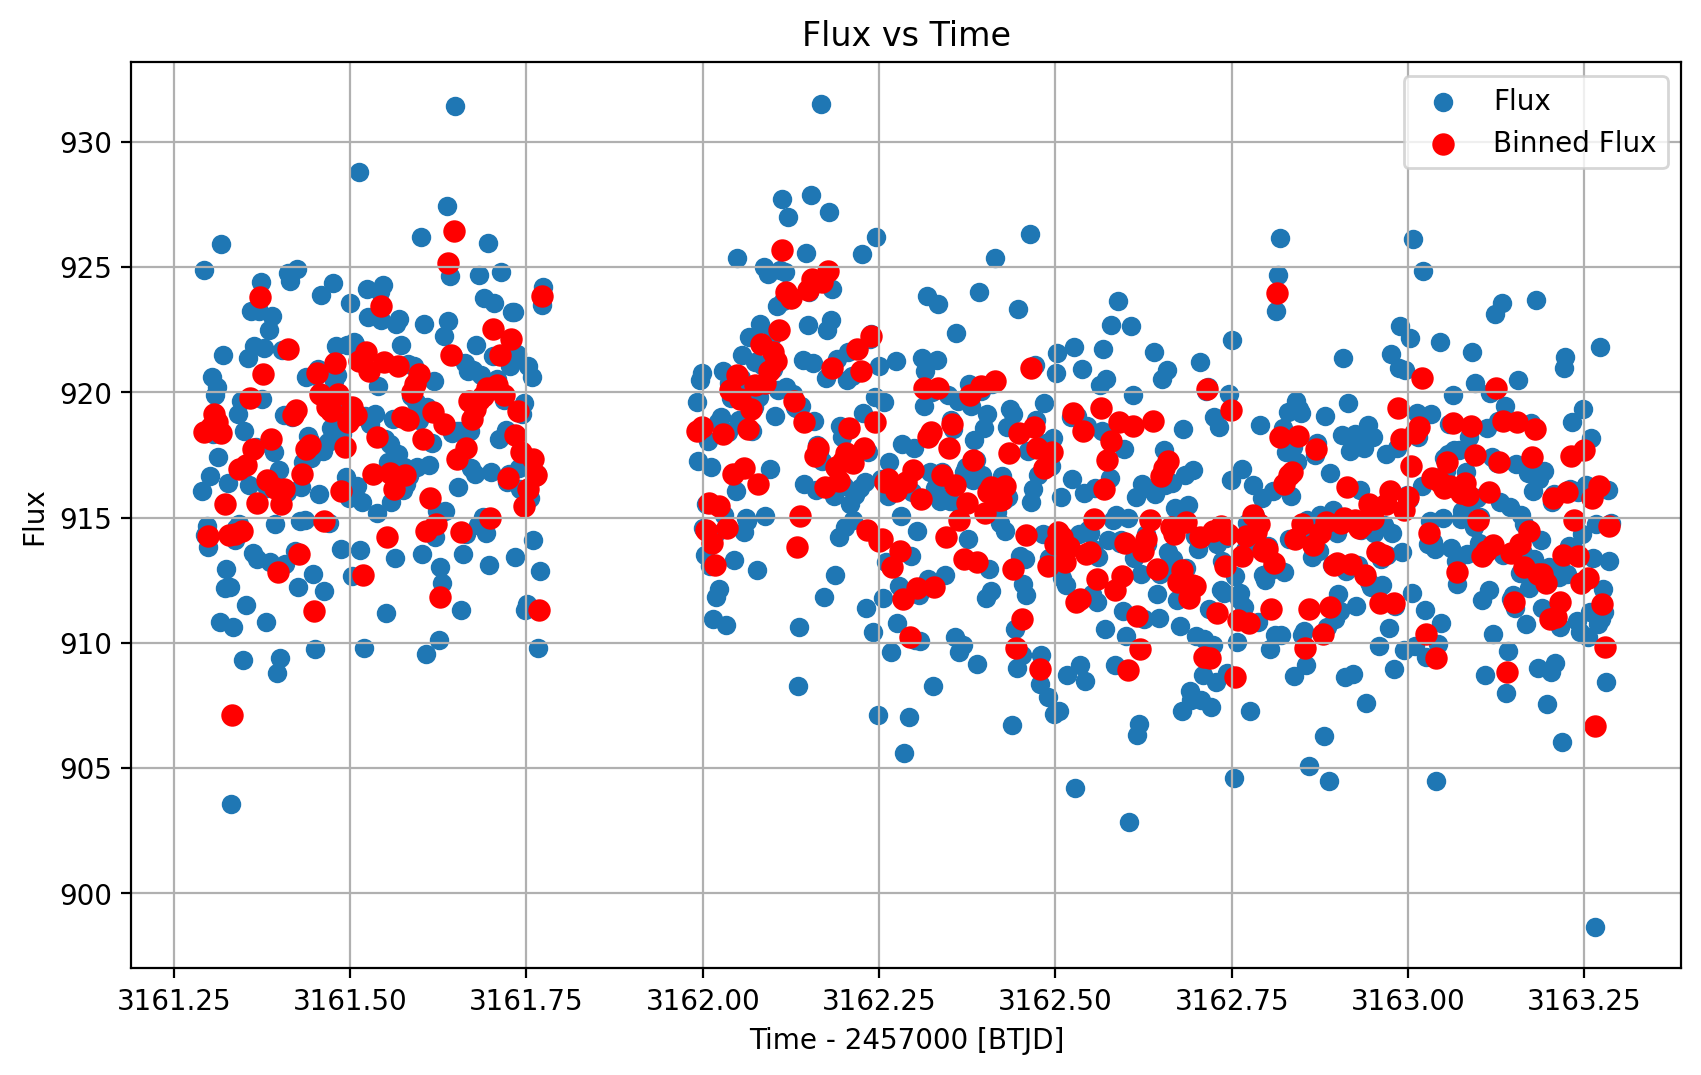

Do you wanna save this transit? (y/n): y
Plot saved.


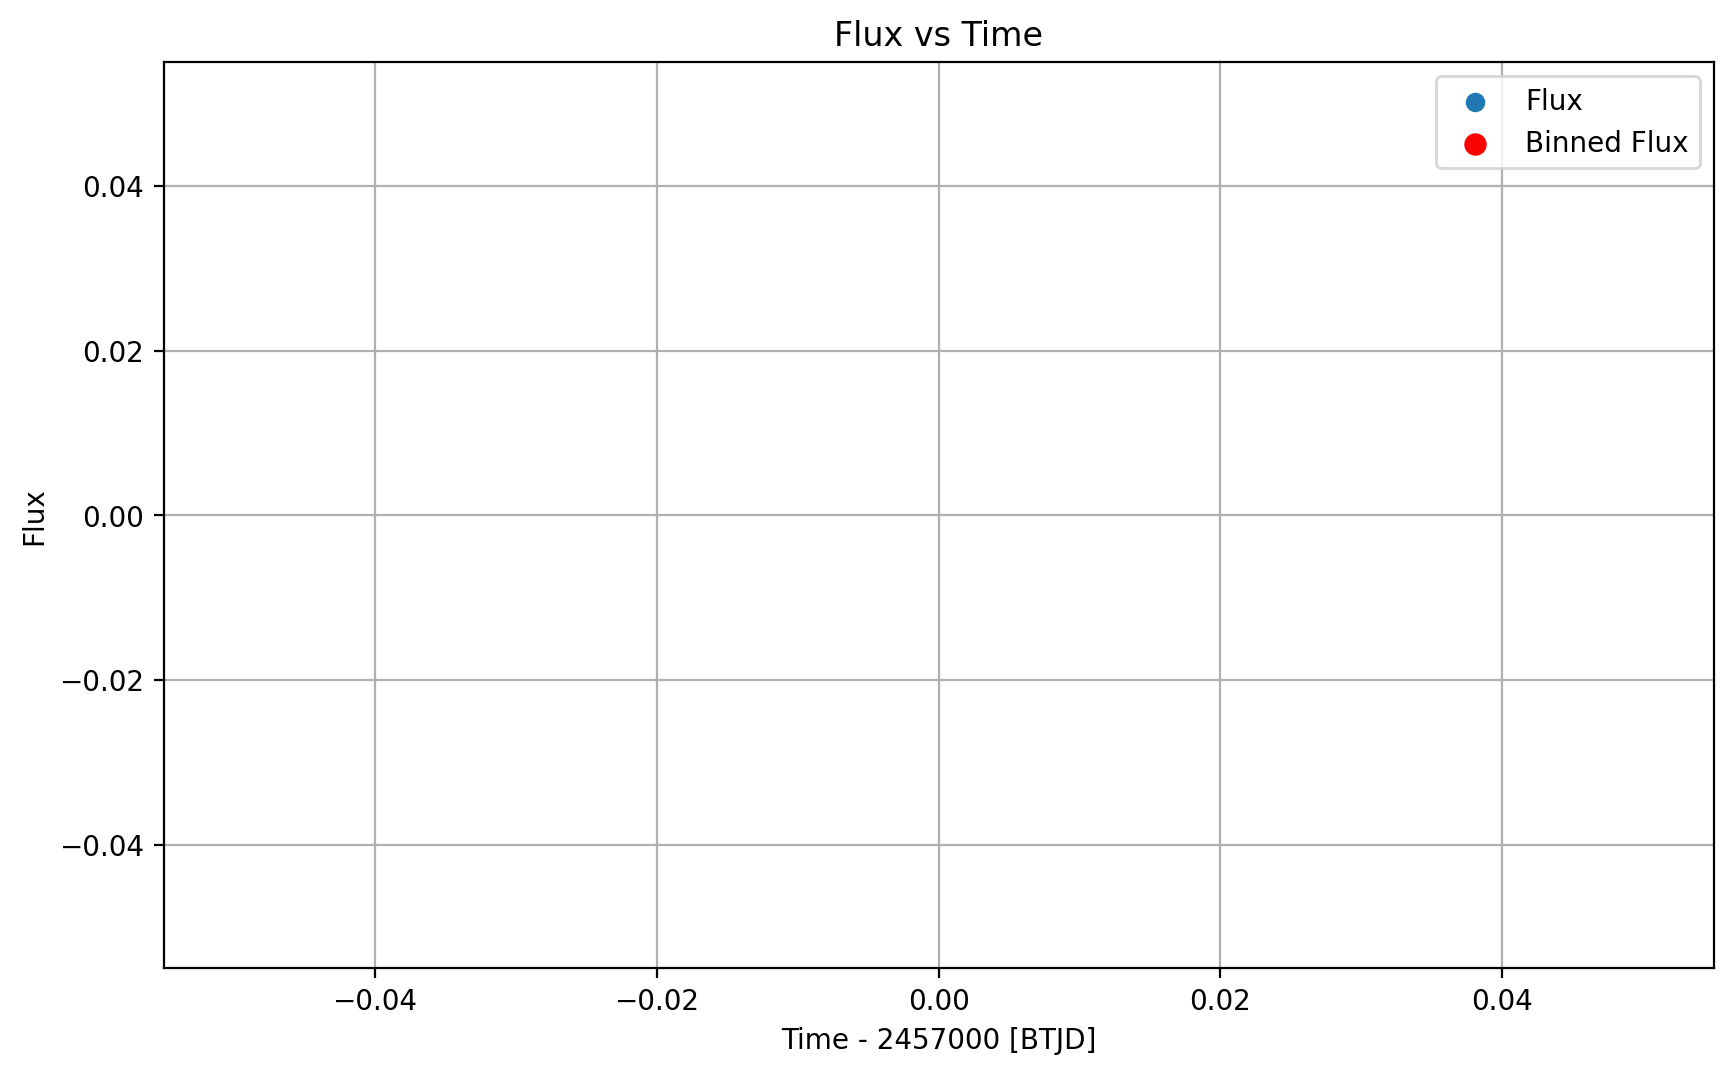

Do you wanna save this transit? (y/n): n
Plot skipped.


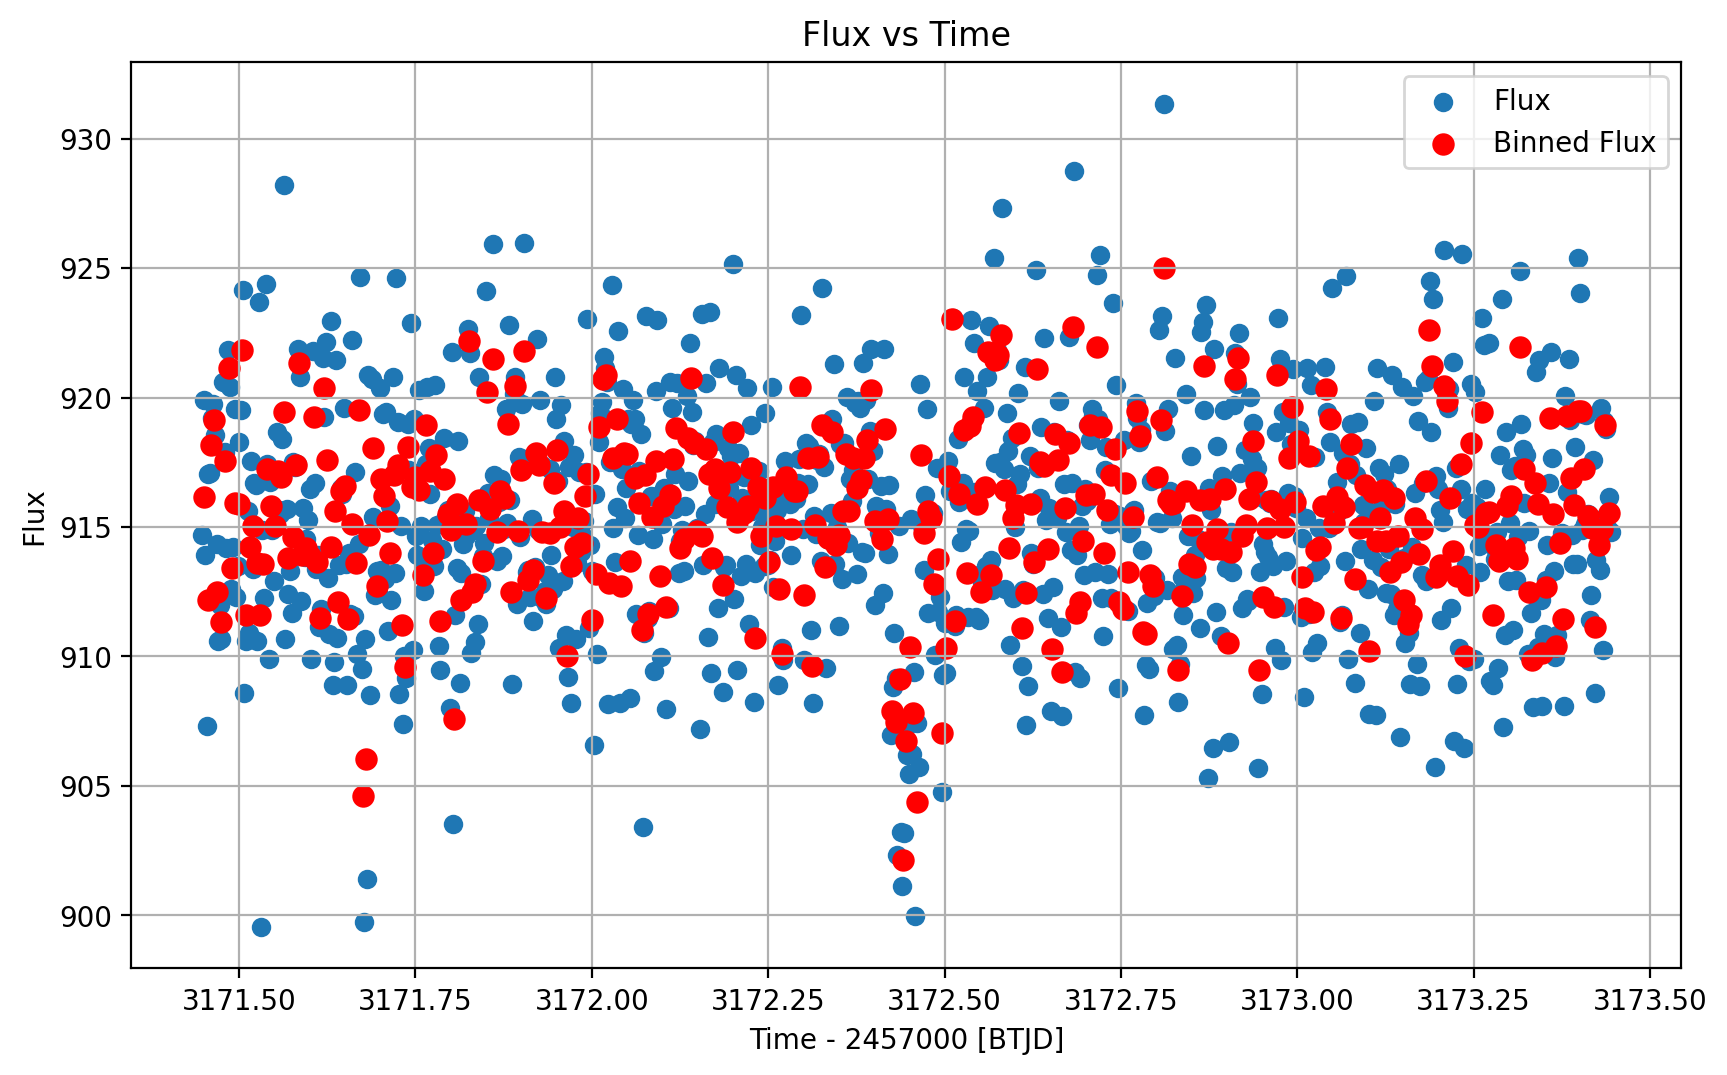

Do you wanna save this transit? (y/n): y
Plot saved.


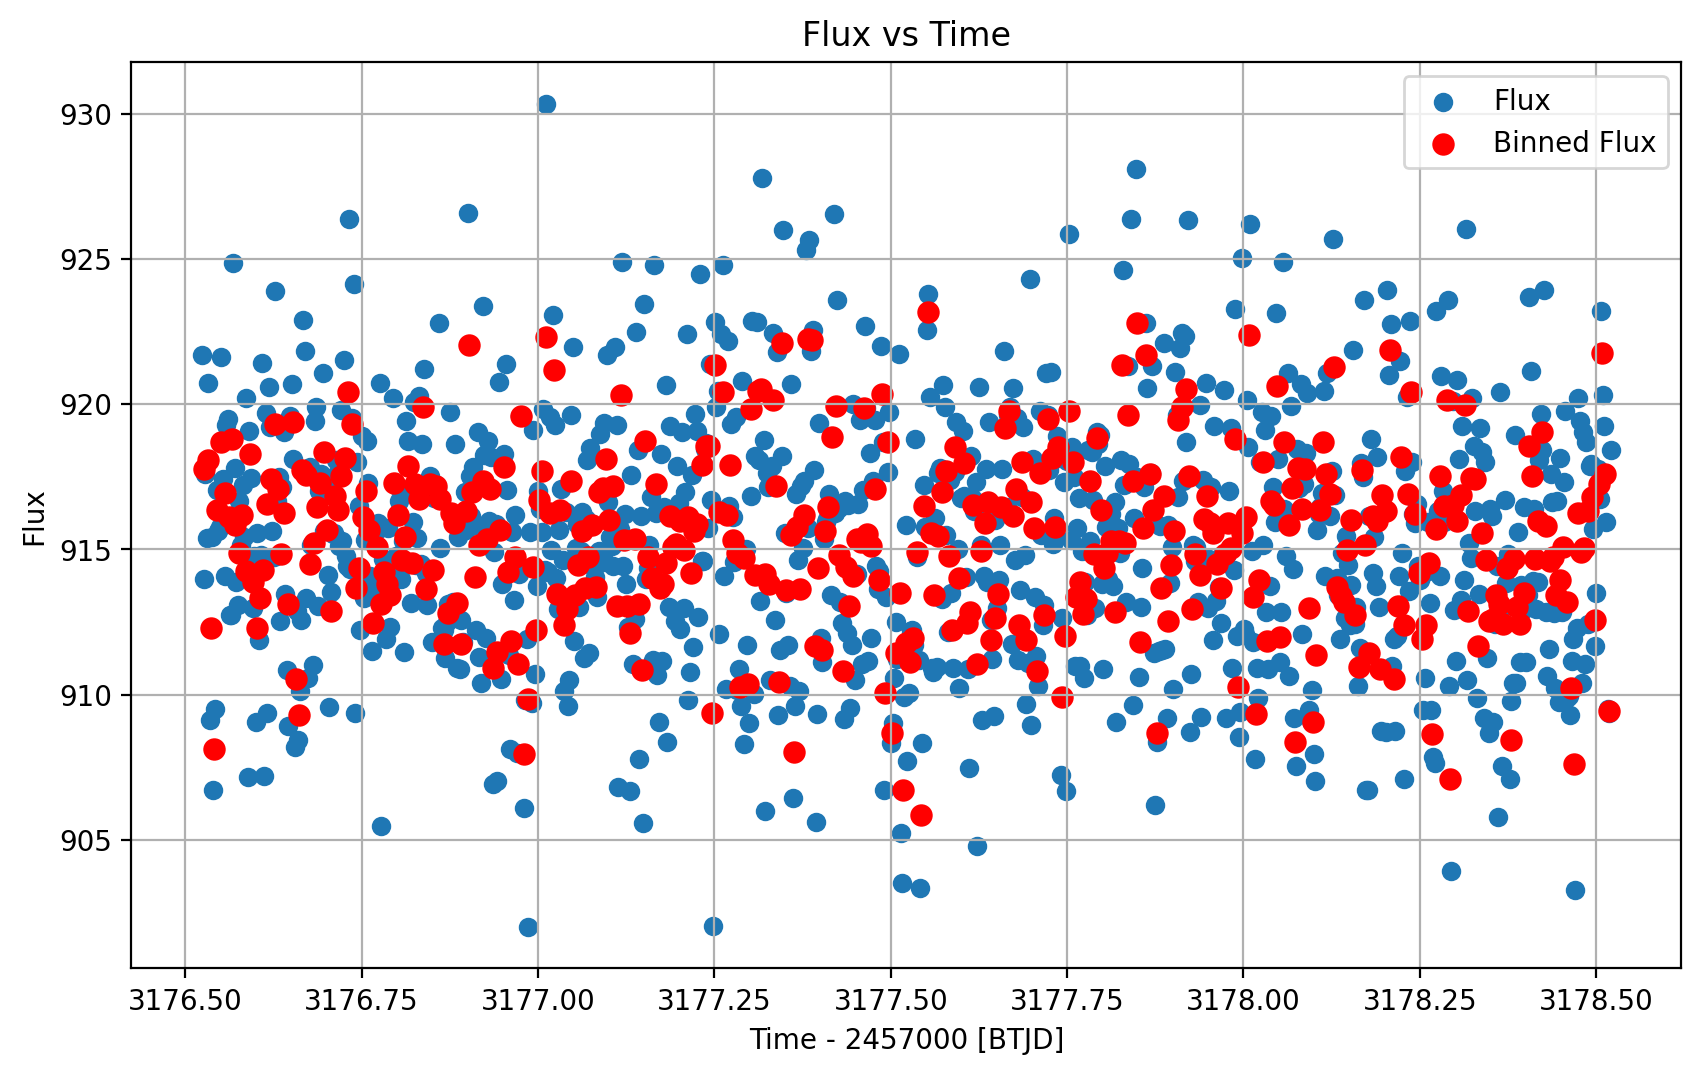

Do you wanna save this transit? (y/n): y
Plot saved.


In [10]:
#Sepparating the possible transits.
#Your goal is to determinate if the transit is worth for saving

lc.select_transit(PATH, binned, name, transits)

Now that you have saved the data you needed go and apply models to them!!